# import libraries

In [54]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns

# Problem Statement

In [55]:
To predict employee salary

SyntaxError: invalid syntax (2228375480.py, line 1)

# Data Gathering

In [56]:
df = pd.read_csv('Salary.csv')
df

,Salary,Gender,Age,PhD
0,14000,male,47,yes
1,3000,female,65,yes
2,3510,female,56,no
3,3000,male,23,no
4,8000,female,53,yes
...,...,...,...,...
95,1860,male,26,no
96,15200,male,56,yes
97,180,male,28,no
98,3500,female,44,no


# EDA

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Salary  100 non-null    int64 
 1   Gender  100 non-null    object
 2   Age     100 non-null    int64 
 3   PhD     100 non-null    object
dtypes: int64(2), object(2)
memory usage: 3.2+ KB


In [58]:
df.describe()

,Salary,Age
count,100.000000,100.000000
mean,5252.450000,46.880000
std,4222.093316,15.271469
min,25.000000,20.000000
25%,2000.000000,31.500000
50%,3930.000000,49.000000
75%,7550.000000,60.000000
max,19000.000000,77.000000


In [59]:
df.value_counts

<bound method DataFrame.value_counts of     Salary  Gender  Age  PhD
0    14000    male   47  yes
1     3000  female   65  yes
2     3510  female   56   no
3     3000    male   23   no
4     8000  female   53  yes
..     ...     ...  ...  ...
95    1860    male   26   no
96   15200    male   56  yes
97     180    male   28   no
98    3500  female   44   no
99     400  female   24   no

[100 rows x 4 columns]>

In [60]:
df['Gender'].value_counts().to_dict()

{'male': 50, 'female': 50}

In [61]:
df['Gender'].replace({'male': 1, 'female': 0},inplace=True)

In [62]:
df['PhD'].value_counts().to_dict()

{'no': 61, 'yes': 39}

In [63]:
df['PhD'].replace({'no': 0, 'yes': 1},inplace = True)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Salary  100 non-null    int64
 1   Gender  100 non-null    int64
 2   Age     100 non-null    int64
 3   PhD     100 non-null    int64
dtypes: int64(4)
memory usage: 3.2 KB


# Feature Selection

### Linearity

<AxesSubplot:>

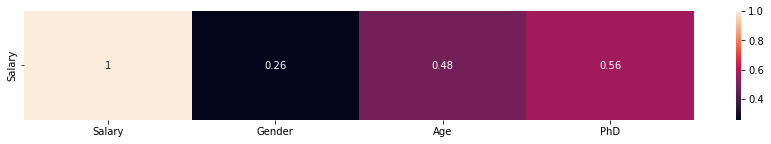

In [65]:
z = df.corr().head(1)
plt.figure(figsize = (15,2))
sns.heatmap(z,annot = True)

# No-Multicollinearity

<AxesSubplot:>

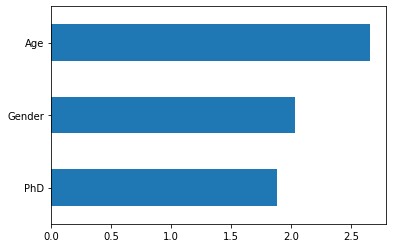

In [66]:
x = df.drop('Salary',axis = 1)
vif_list = []
for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.to_numpy(),i)
    vif_list.append(vif)

S1 = pd.Series(vif_list,index = x.columns)
S1.sort_values().plot(kind = 'barh')

# Train_test_Split

In [67]:
x = df.drop('Salary',axis= 1)
y = df['Salary']

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 8)

# Training_model_evaluation

In [69]:
linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression()

In [70]:
y_train_pred = linear_reg.predict(x_train)
mse = mean_squared_error(y_train,y_train_pred)
print('MSE :',mse)

rmse = np.sqrt(mse)
print('RMSE :',rmse)

mae = mean_absolute_error(y_train,y_train_pred)
print('MAE :',mae)

r2 = r2_score(y_train,y_train_pred)
print('R2 :',r2)

MSE : 10714071.238903465
RMSE : 3273.2355917201353
MAE : 2378.3081835745957
R2 : 0.4026787775757181


In [71]:
y_test_pred = linear_reg.predict(x_test)
mse = mean_squared_error(y_test,y_test_pred)
print('MSE :',mse)

rmse = np.sqrt(mse)
print('RMSE :',rmse)

mae = mean_absolute_error(y_test,y_test_pred)
print('MAE :',mae)

r2 = r2_score(y_test,y_test_pred)
print('R2 :',r2)

MSE : 9379483.883052971
RMSE : 3062.5943059852
MAE : 2356.4171593609485
R2 : 0.405524083504332


# One Line Testing

In [72]:
df

,Salary,Gender,Age,PhD
0,14000,1,47,1
1,3000,0,65,1
2,3510,0,56,0
3,3000,1,23,0
4,8000,0,53,1
...,...,...,...,...
95,1860,1,26,0
96,15200,1,56,1
97,180,1,28,0
98,3500,0,44,0


In [73]:
df.columns

Index(['Salary', 'Gender', 'Age', 'PhD'], dtype='object')

In [74]:
df.head(1).T

,0
Salary,14000
Gender,1
Age,47
PhD,1


In [83]:
# Salary = 10000
Gender = 'male'
Age    = 27
PhD    = 'yes'

In [84]:
lable_encoded_columns = {'Gender':{'male': 1, 'female': 0},'PhD':{'no': 0, 'yes': 1},
                         'columns':list(x.columns)}

In [85]:
lable_encoded_columns

{'Gender': {'male': 1, 'female': 0},
 'PhD': {'no': 0, 'yes': 1},
 'columns': ['Gender', 'Age', 'PhD']}

In [86]:
test_array=np.zeros(x.shape[1])
test_array[0] = lable_encoded_columns['Gender'][Gender]
test_array[1] = Age
test_array[2] = lable_encoded_columns['PhD'][PhD]

test_array

array([ 1., 27.,  1.])

In [87]:
linear_reg.predict([test_array])

C:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5788.90420048])

In [88]:
import pickle
with open ('Salarypkl.pkl','wb') as a:
    pickle.dump(linear_reg,a)

In [89]:
import json
with open ('label_encoded.json','w') as a:
    json.dump(lable_encoded_columns,a)